#**Libraries**


In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings ('ignore')
from sklearn.preprocessing import LabelEncoder

#**Data Entry**


In [9]:
#import data
dt=pd.read_csv("Titanic.csv")

In [10]:
#show the data
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#more details
dt.info()
# data has 12 columns
# 891 rows
# 2floats
# 5 integers
# 5 objects
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#statistical description of data
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#**Data Cleaning**


In [13]:
#find mising values
dt.isnull().sum()
# the column age, embarked and cabin have missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Drop unnecessary columns or features that may not contribute much to survival prediction
dt = dt.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [15]:
# confirming data is dropped
print(dt.head())

# Checking the columns
print(dt.columns)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [16]:
dt.info()
# 8 columns
# 891 rows
# 2 objects
# 2 floats
# 4 integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
# Fixing missing values
dt['Age'] = dt['Age'].fillna(dt['Age'].mean())
dt['Embarked'] = dt['Embarked'].fillna(dt['Embarked'].mode()[0])

In [18]:
# Check for missing values after replacing them
missing_values_after_fill = dt.isnull().sum()

# Display the results
print(missing_values_after_fill)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [19]:
# Convert to binary using labelencoder
le = LabelEncoder()
dt['Sex'] = le.fit_transform(dt['Sex'])
dt['Embarked'] = le.fit_transform(dt['Embarked'])

# after Label Encoding
print(dt['Sex'].unique())

#males are represented by 1
# females are represented by 0

[1 0]


In [20]:
#total number of duplicates
dt.duplicated().sum()

111

In [21]:
# dropping duplicates
# dr
dt=dt.drop_duplicates()

In [22]:
#total number of duplicates
#all duplicates have been dropped
dt.duplicated().sum()

0

In [23]:
#finding outliers
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1
threshold=1.5*iqr
outliers=dt[((dt<(q1-threshold))|(dt>(q1+threshold)))]
outliers.count()

Survived      0
Pclass        0
Sex           0
Age         121
SibSp        66
Parch        90
Fare        156
Embarked      0
dtype: int64

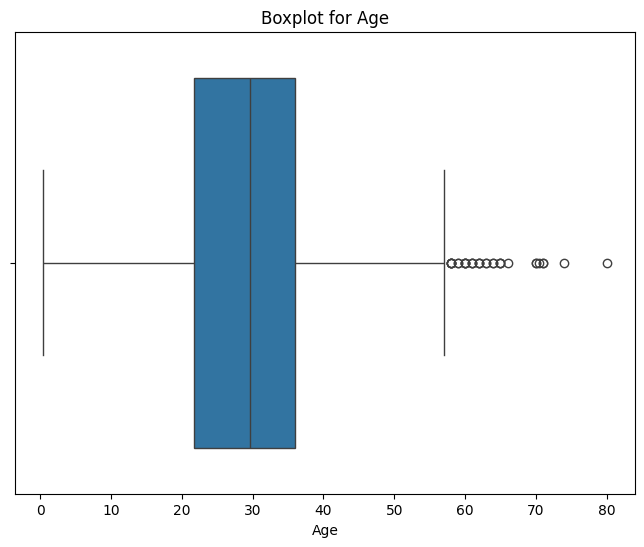

In [24]:
#visualisation of outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=dt)
plt.title('Boxplot for Age')
plt.show()

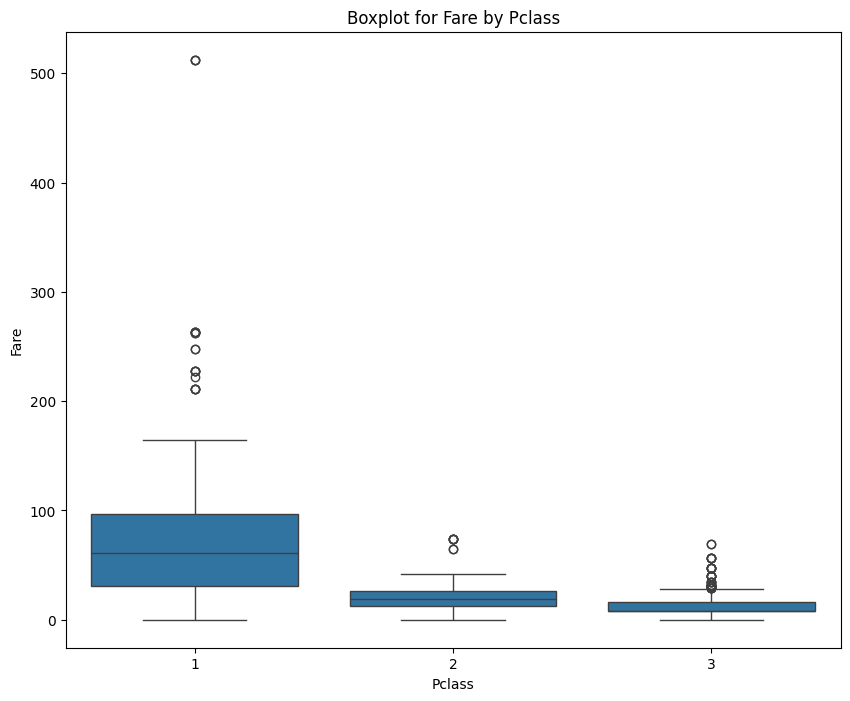

In [25]:
# Boxplot for 'Fare' by 'Pclass'
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Fare', data=dt)
plt.title('Boxplot for Fare by Pclass')
plt.show()

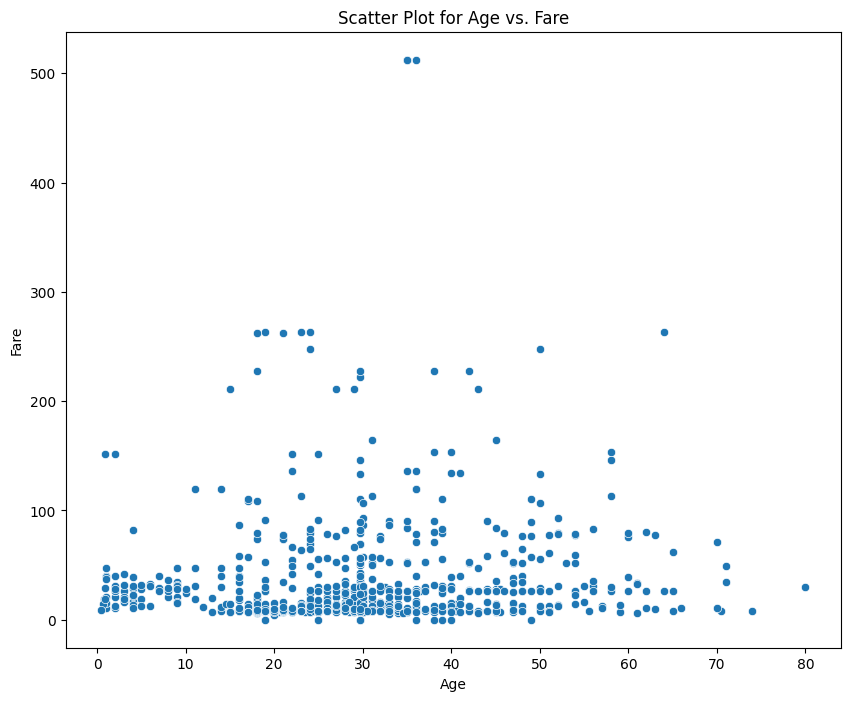

In [26]:
# Scatter plot for 'Age' vs. 'Fare'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Fare', data=dt)
plt.title('Scatter Plot for Age vs. Fare')
plt.show()

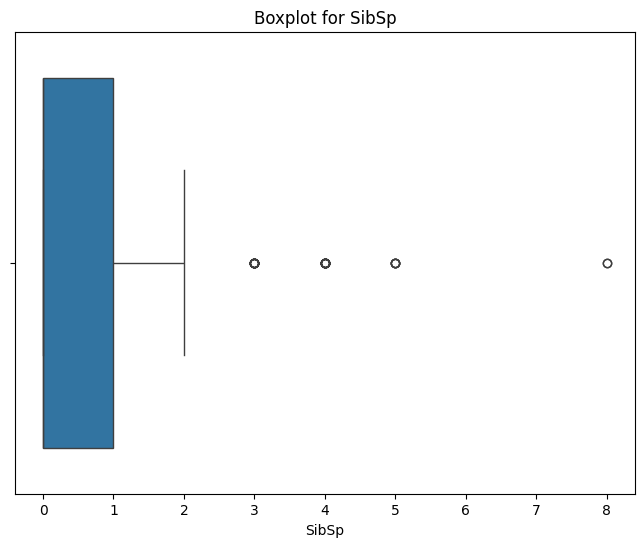

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='SibSp', data=dt)
plt.title('Boxplot for SibSp')
plt.show()

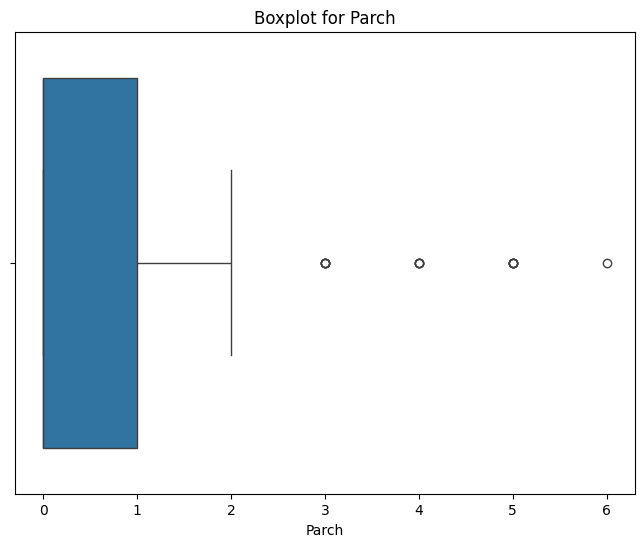

In [28]:
# box plot for parch outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parch', data=dt)
plt.title('Boxplot for Parch')
plt.show()

#**Exploratory Data Analysis (EDA)**

**1. Univariate**

In [29]:
dt["Age"].value_counts()
#counting the age of each survivor

Age
29.699118    104
24.000000     29
18.000000     25
22.000000     24
19.000000     23
            ... 
36.500000      1
0.920000       1
23.500000      1
55.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

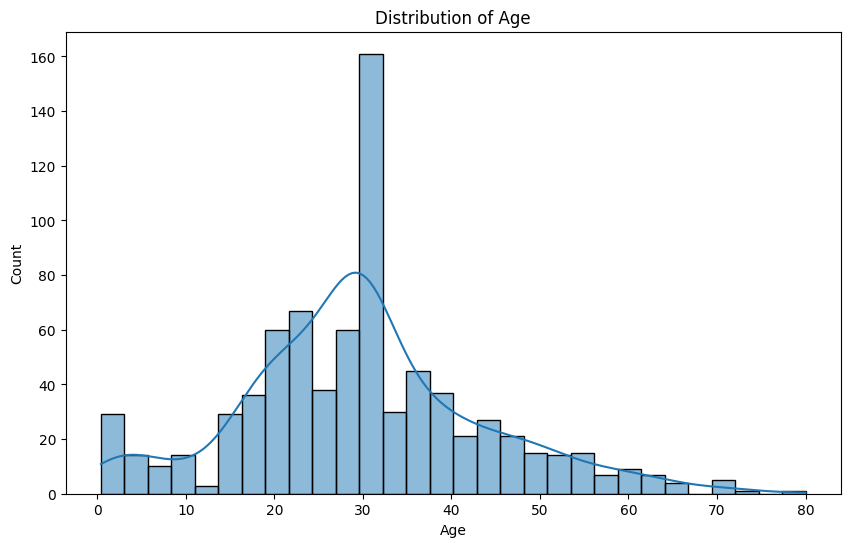

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [31]:
dt["SibSp"].value_counts()
#counting the sibsp of each survivor

SibSp
0    513
1    201
2     27
4     18
3     14
5      5
8      2
Name: count, dtype: int64

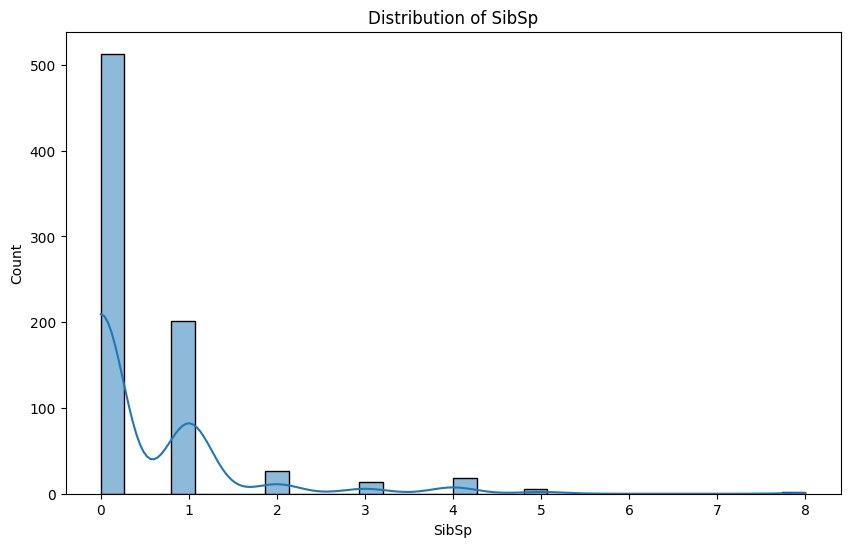

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['SibSp'].dropna(), bins=30, kde=True)
plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

In [33]:
dt["Survived"].value_counts()
#counting the number of survivors based on gender

Survived
0    458
1    322
Name: count, dtype: int64

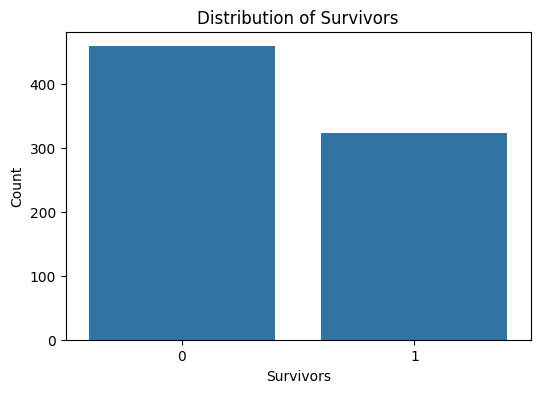

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=dt)
plt.title('Distribution of Survivors')
plt.xlabel('Survivors')
plt.ylabel('Count')
plt.show()

In [35]:
dt["Sex"].value_counts()
#counting the number of survivors based on gender

Sex
1    488
0    292
Name: count, dtype: int64

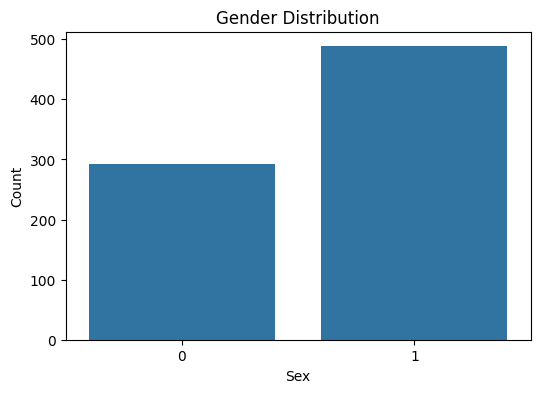

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=dt)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [37]:
dt["Pclass"].value_counts()
#counting the number of survivors based on gender

Pclass
3    404
1    212
2    164
Name: count, dtype: int64

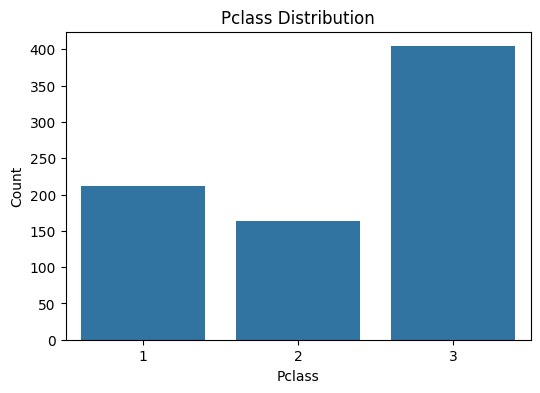

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=dt)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [39]:
dt["Parch"].value_counts()
#counting the number of survivors based on gender

Parch
0    576
1    114
2     75
5      5
3      5
4      4
6      1
Name: count, dtype: int64

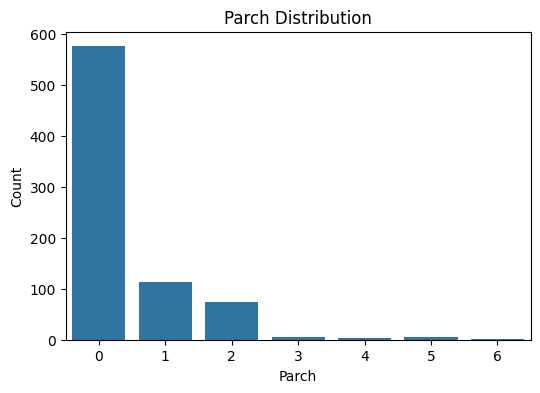

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', data=dt)
plt.title('Parch Distribution')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

In [41]:
dt["Fare"].value_counts()
#counting the number of survivors based on gender

Fare
13.0000    31
26.0000    30
8.0500     25
10.5000    23
7.8958     20
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: count, Length: 248, dtype: int64

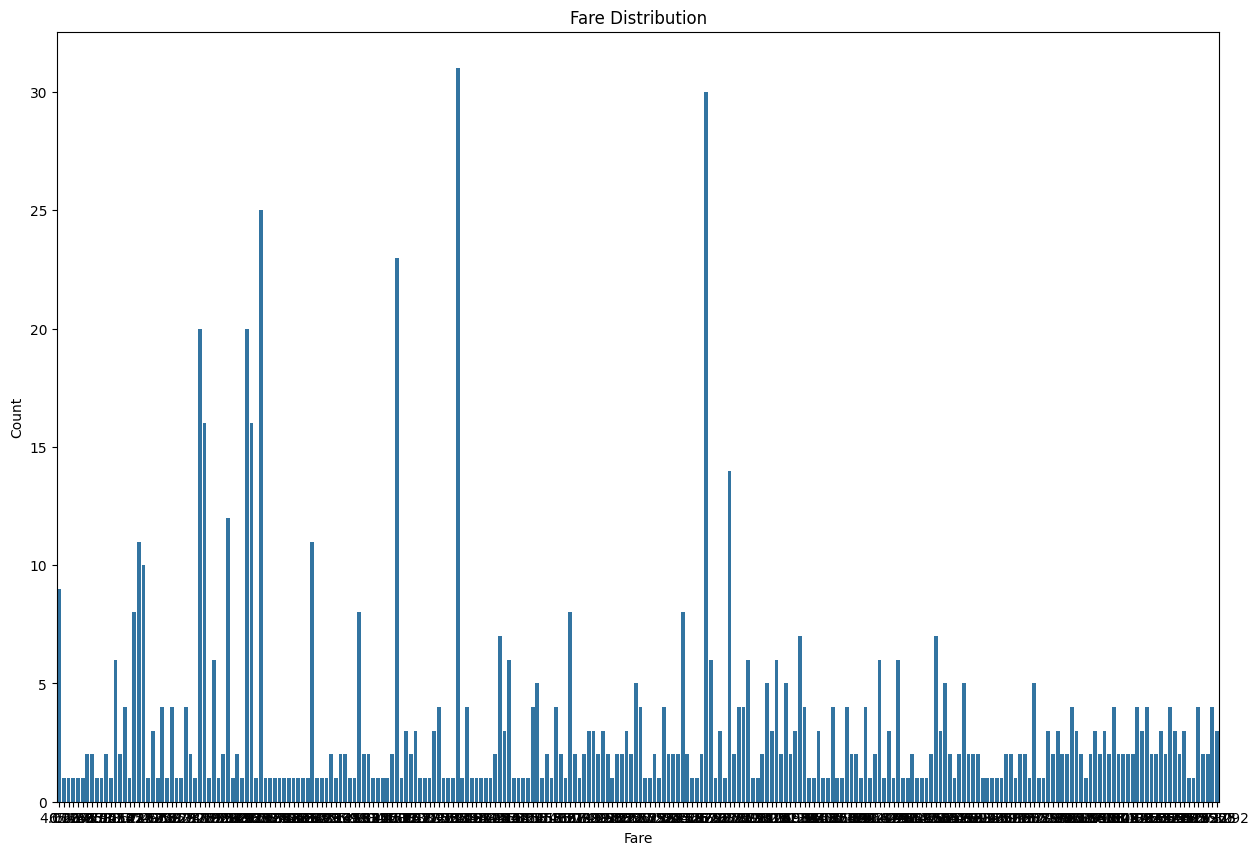

In [42]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Fare', data=dt)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [43]:
dt["Embarked"].value_counts()
#counting the number of survivors based on gender

Embarked
2    567
0    155
1     58
Name: count, dtype: int64

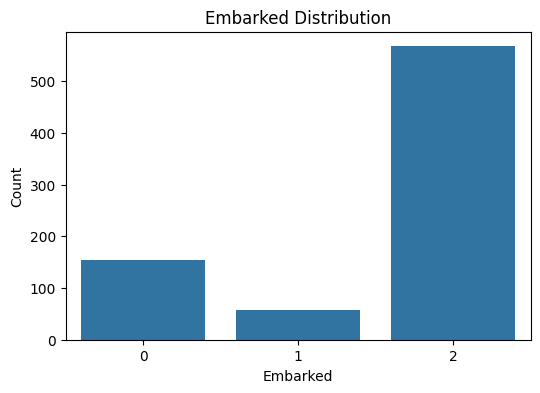

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=dt)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

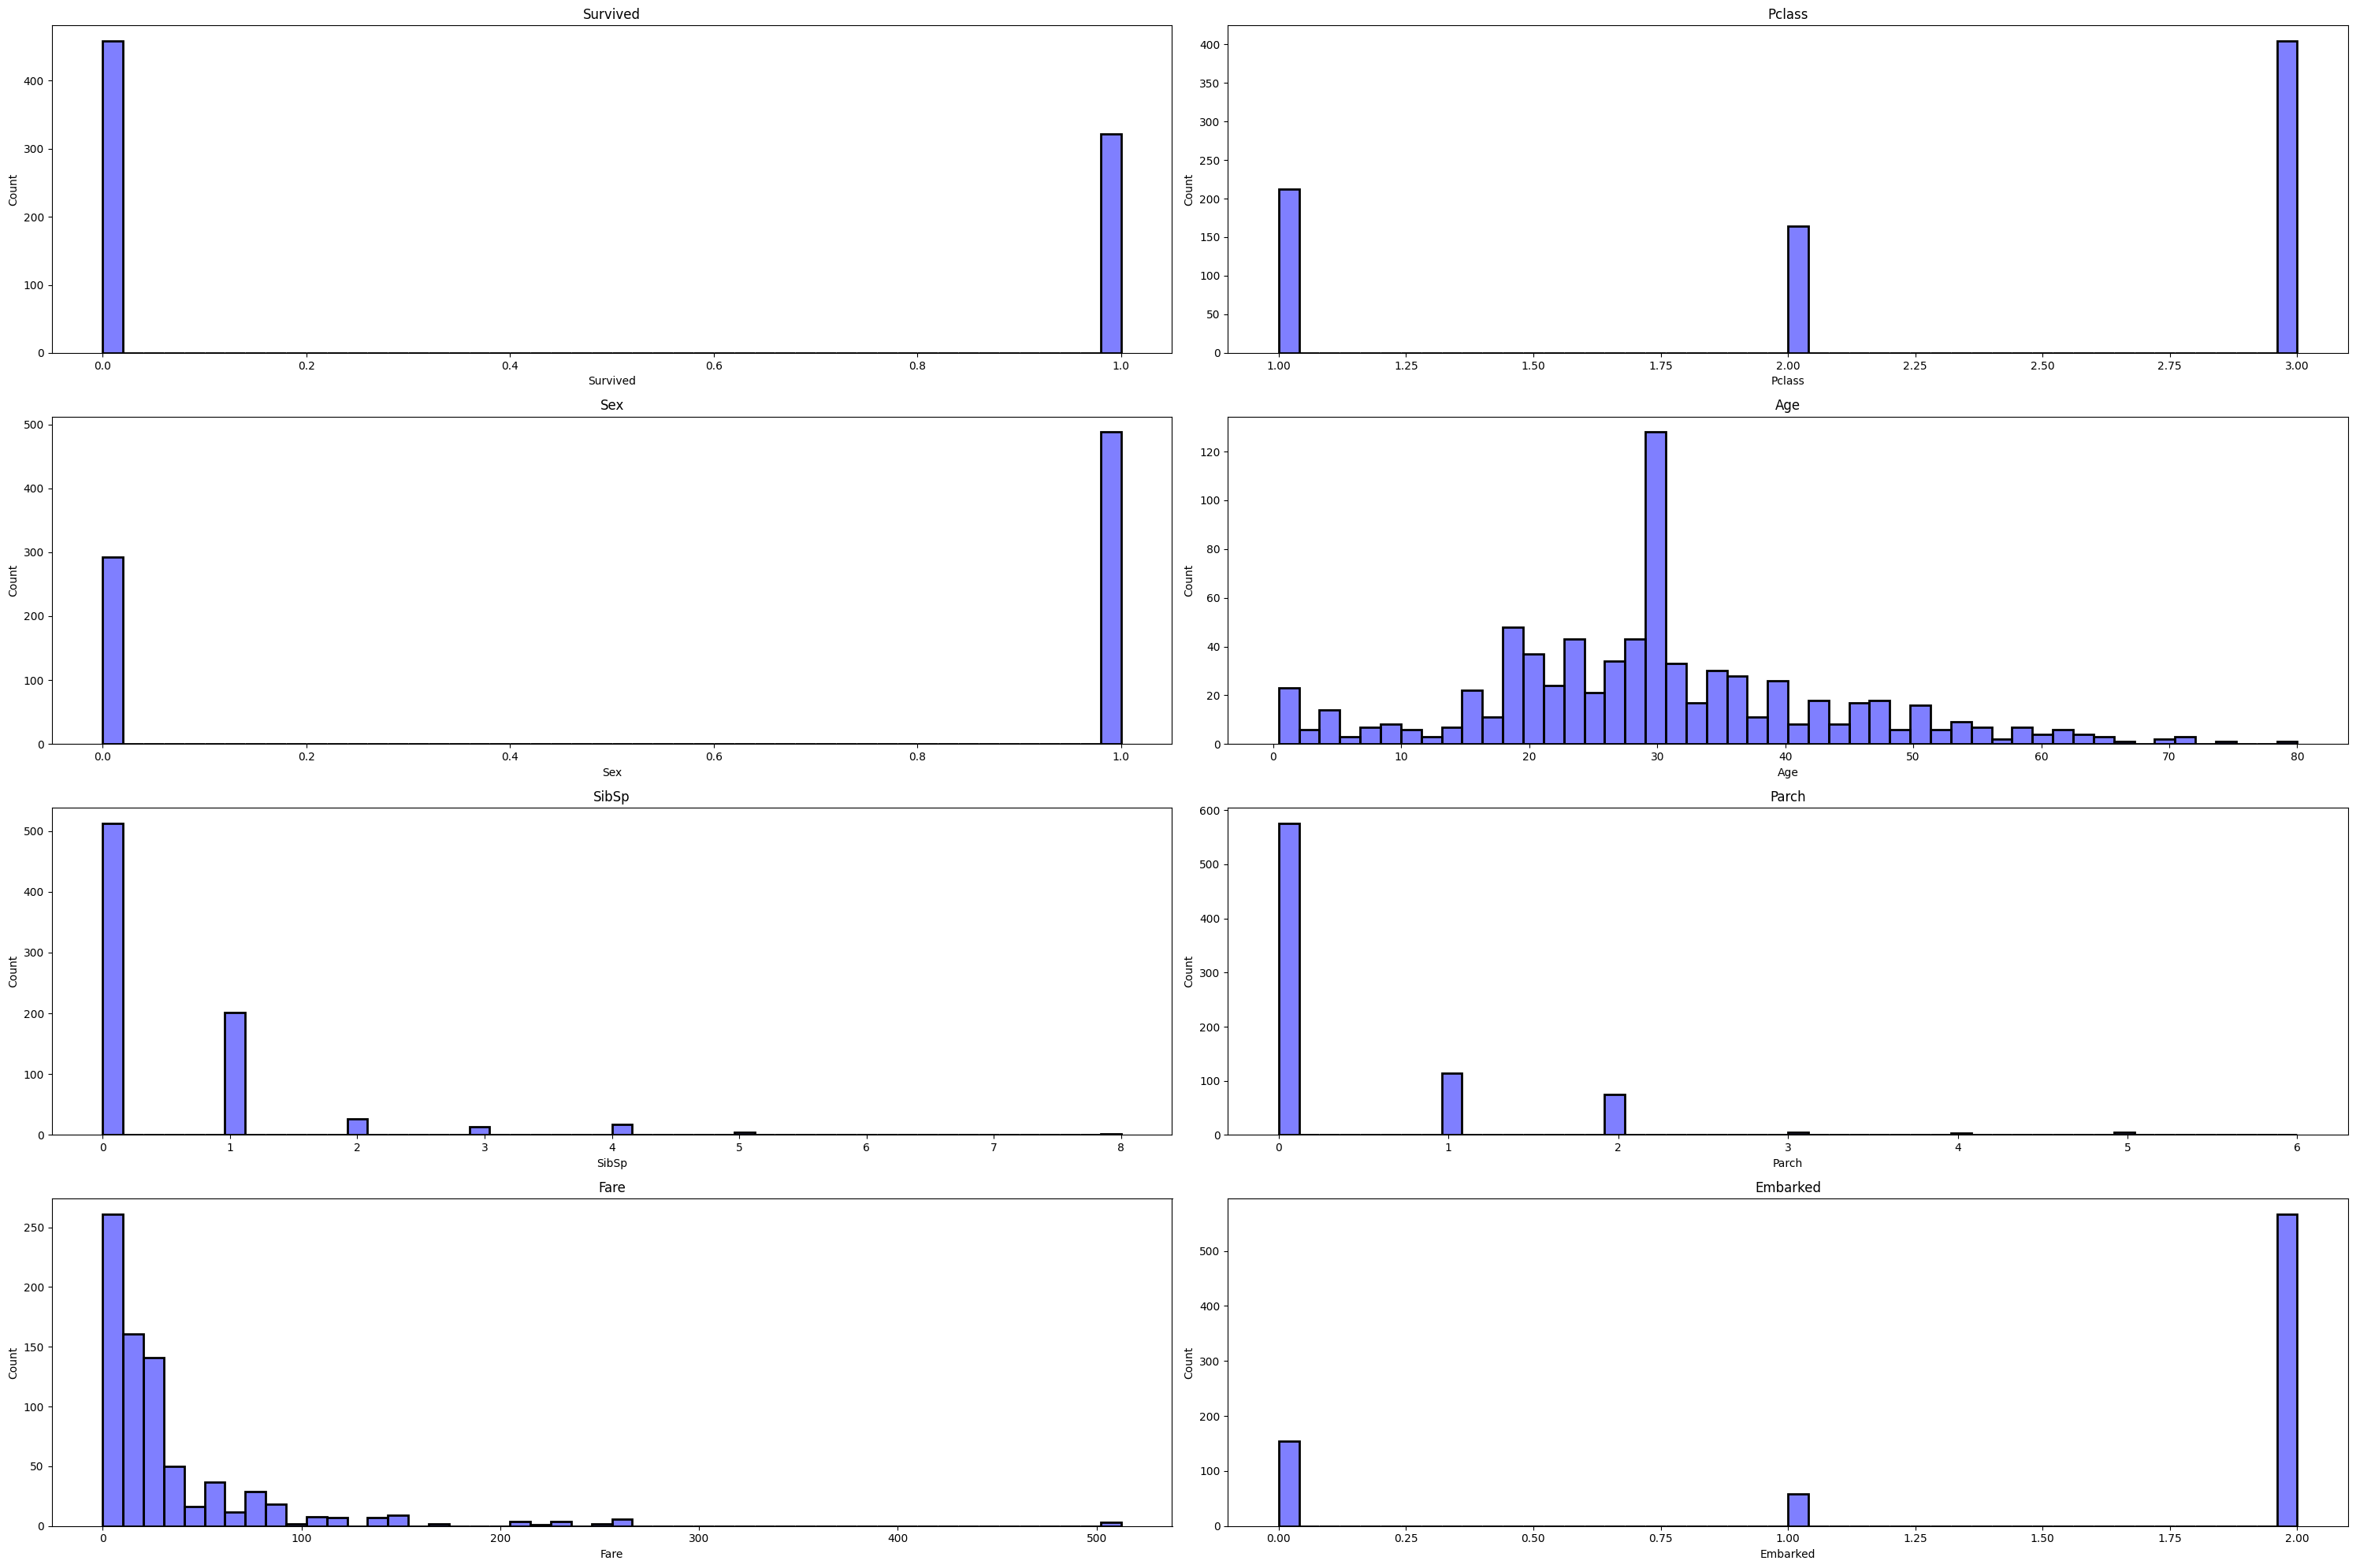

In [45]:
fig, axes = plt.subplots(4, 2, figsize=(30, 20))
visuals = dt[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

for cols, ax in zip(visuals.columns, axes.flatten()):
    sns.histplot(dt[cols], ax=ax, bins=50, edgecolor='black', color='blue', alpha=0.5, linewidth=2)
    ax.set_title(cols)

plt.tight_layout()
plt.show()

# a loop diagram of the columns

**Bivariate**

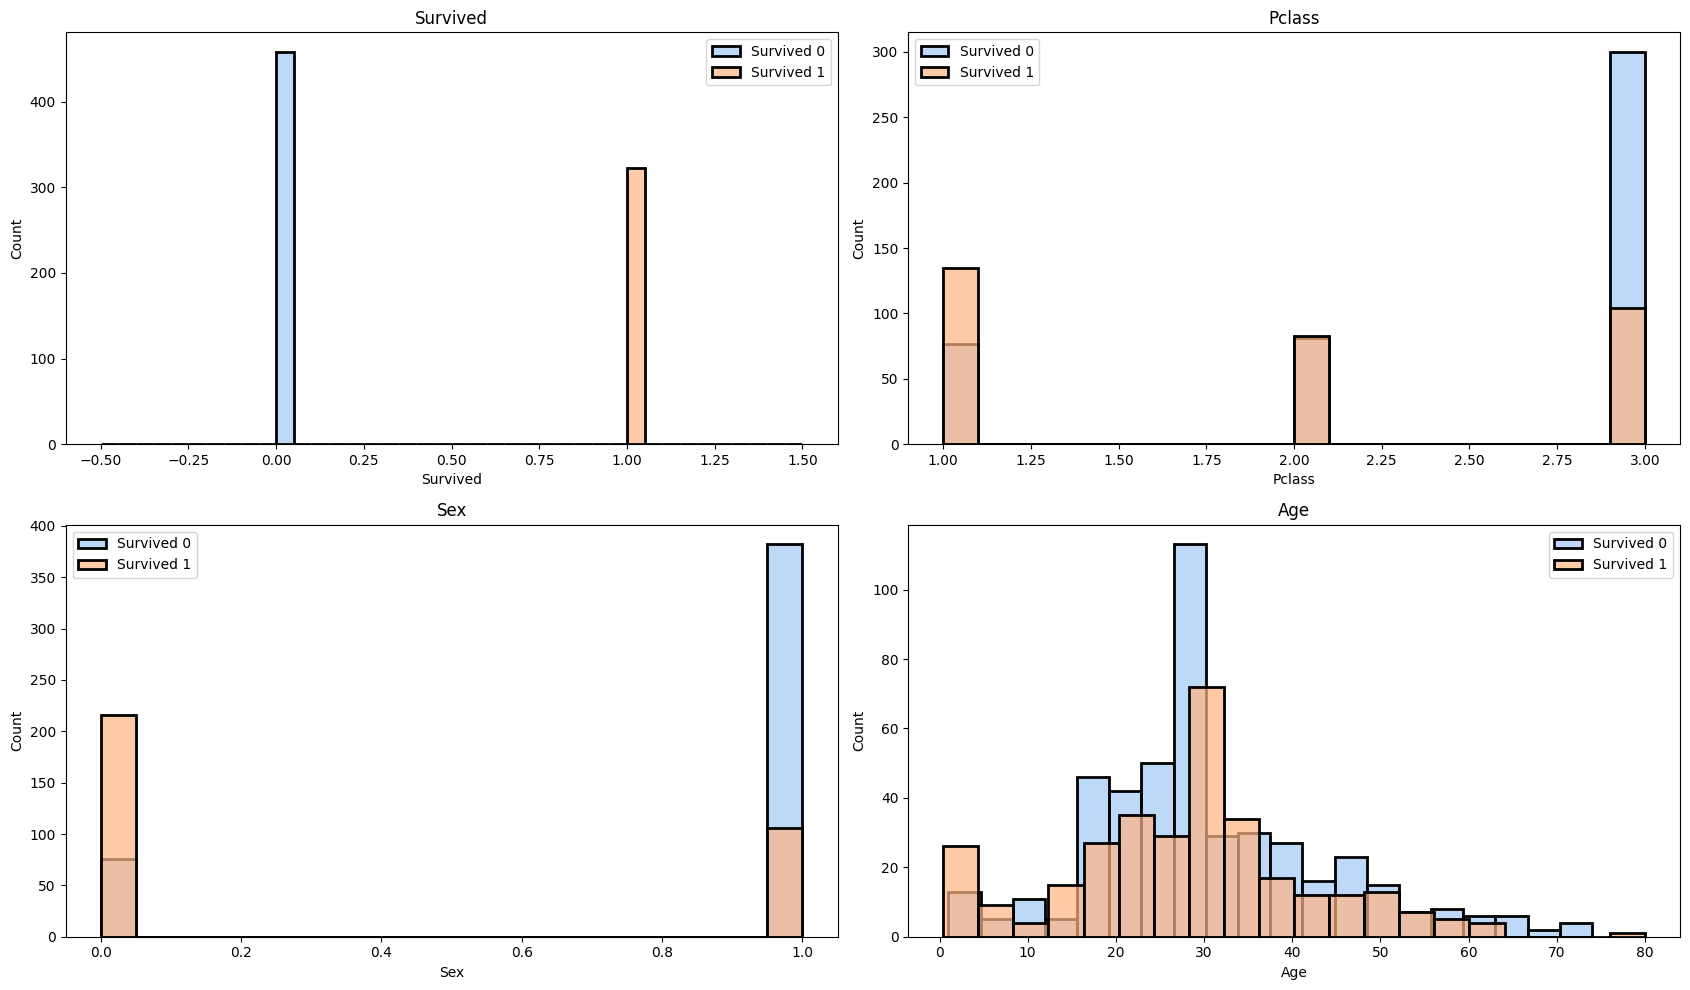

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))
colors = sns.color_palette("pastel")[:3]  # Use the first three colors from the pastel palette
visuals = dt[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

for col, ax in zip(visuals.columns, axes.flatten()):
    for Survived, color in zip(dt['Survived'].unique(), colors):
        sns.histplot(data=dt[dt['Survived'] == Survived], x=col, ax=ax, color=color, bins=20, edgecolor='black', alpha=0.7, linewidth=2, label=f'Survived {Survived}')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

#male-blue
#female-pink


**Correlation Matrix**

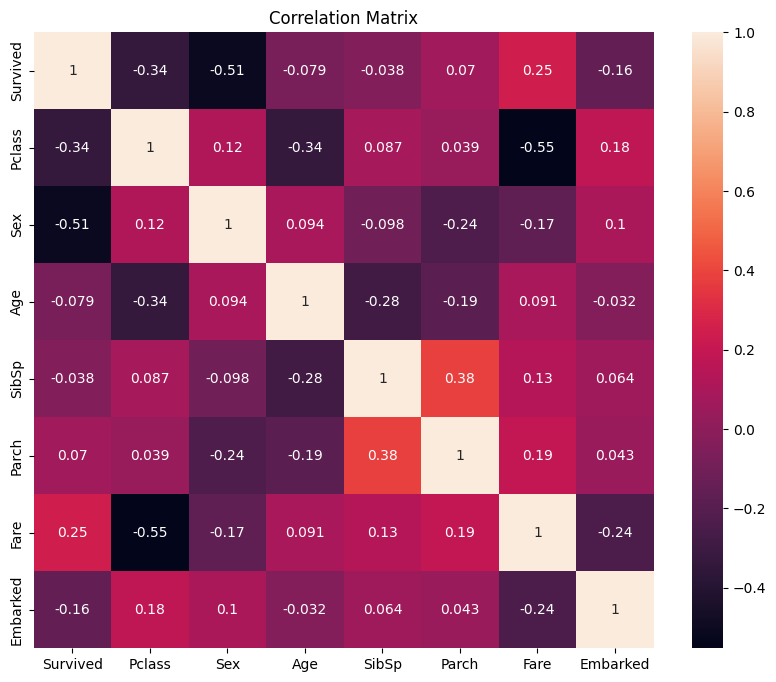

In [47]:
#correlation matrix
correlation_mat = dt.corr()

#visualisation of correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()


# There is high correlation between the columns


#**MODELLING**


**Data Training**

In [48]:
# splitting data for training
x = dt.drop('Survived', axis = 1)
y = dt[['Survived']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)


**Feature Importance**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

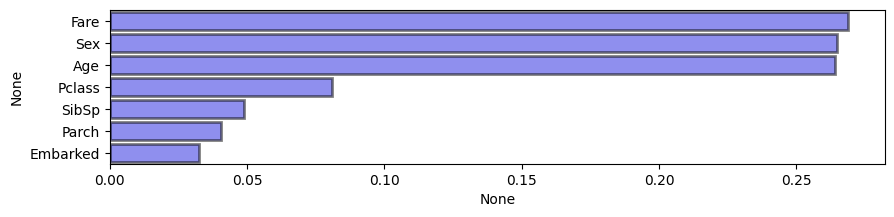

In [50]:
feature_importance = pd.Series(rfc.feature_importances_, x.columns).sort_values(ascending = False)
fig, axes = plt.subplots(figsize = (10,2))
sns.barplot(x=feature_importance, y=feature_importance.index, color='blue', alpha=0.5, edgecolor = 'black', linewidth = 2);

#for accurate prediction use Fare, Age and Sex.

**Models**

**1. RandomForestClassifier**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

# this model has a 75% accuracy level

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       131
           1       0.78      0.65      0.71       103

    accuracy                           0.76       234
   macro avg       0.77      0.75      0.76       234
weighted avg       0.77      0.76      0.76       234



**2. Logic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

# this model has a 72% accuracy level

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       131
           1       0.71      0.62      0.66       103

    accuracy                           0.72       234
   macro avg       0.72      0.71      0.71       234
weighted avg       0.72      0.72      0.72       234



**3. Lazy Predict**

In [53]:
pip install -q lazypredict

In [54]:
from lazypredict.Supervised import LazyClassifier
reg = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models


# The best model is the LGBM Classifier

100%|██████████| 29/29 [00:03<00:00,  8.84it/s]


[LightGBM] [Info] Number of positive: 219, number of negative: 327
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 546, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401099 -> initscore=-0.400888
[LightGBM] [Info] Start training from score -0.400888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.78,0.77,0.77,0.77,0.20
XGBClassifier,0.77,0.76,0.76,0.77,0.17
AdaBoostClassifier,0.76,0.76,0.76,0.76,0.26
SVC,0.76,0.76,0.76,0.76,0.06
NuSVC,0.76,0.75,0.75,0.76,0.20
RandomForestClassifier,0.76,0.75,0.75,0.76,0.23
QuadraticDiscriminantAnalysis,0.75,0.74,0.74,0.75,0.04
LabelPropagation,0.75,0.74,0.74,0.75,0.14
LabelSpreading,0.75,0.74,0.74,0.75,0.08
